# Bertrand's Paradox

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt, cos, sin, pi
from sympy import symbols, Eq, solve
from tqdm import tqdm

In [2]:
def plotBKG():
    #Plot the background circle and triangle at arbitrary angle
    plt.rcParams['axes.facecolor'] = 'None'
    circle = plt.Circle((0, 0), r, facecolor='none', edgecolor='b')
    plt.gca().add_patch(circle)
    theta = 137
    coords = [[r*cos(theta), r*sin(theta)],
              [r*cos(theta+2*pi/3),r*sin(theta+2*pi/3)],
              [r*cos(theta+4*pi/3), r*sin(theta+4*pi/3)]]
    triangle = plt.Polygon(coords, linewidth=2, facecolor='none', edgecolor='r')
    plt.gca().add_patch(triangle)
    plt.axis('scaled')

In [3]:
def solve4points(m,b,shift=0):
    #Find circle intersections (too lazy to do the math manually)
    x, y = symbols('x y', real=True)
    eq1 = Eq(y - m*(x-shift) - b, 0)
    eq2 = Eq(r**2-x**2-y**2, 0)
    solutions = solve((eq1,eq2), (x, y))
    point1 = [float(solutions[0][0]), float(solutions[0][1])]
    point2 = [float(solutions[1][0]), float(solutions[1][1])]
    return point1, point2

### Multiple Methods
    Note there's additional methods, such as 2 random points within the square
    said points generate a line, which makes a chord, who's associated P(C>L)=2/3

In [4]:
def randomEndpoints(): #M1
    
    #Generate line from two random points on circle
    theta1 = np.random.uniform(0,2*pi)
    theta2 = np.random.uniform(0,2*pi)
    x1 = r*cos(theta1); x2 = r*cos(theta2)
    y1 = r*sin(theta1); y2 = r*sin(theta2)
    m = (y2-y1)/(x2-x1); b = y1-m*x1

    #Generate chord from line
    X = np.linspace(np.min([x1,x2]),np.max([x1,x2]),100)
    Y = [m*x+b for x in X]

    #Determine if chord is longer than L
    C = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    longer = C>L

    return longer, X, Y

In [5]:
def randomRadius(): #M2
    
    #Generate random point along random radii
    theta = np.random.uniform(0,2*pi)
    rpoint = np.random.uniform(0,r)
    rx = rpoint*cos(theta)
    ry = rpoint*sin(theta)
    m = -rx/ry; b = ry

    #Generate chord from points
    p1, p2 = solve4points(m, b, rx)
    X = np.linspace(p1[0],p2[0],100)
    Y = [m*(x-rx)+b for x in X]

    #Determine if chord is longer than L
    C = np.sqrt(np.abs(p1[0]-p2[0])**2 + np.abs(p1[1]-p2[1])**2)
    longer = C>L

    return longer, X, Y

In [6]:
def randomMidpoint(): #M3

    #Pick random coordinate within circle
    outside = True
    while(outside):
        rx = np.random.uniform(-r,r)
        ry = np.random.uniform(-r,r)
        outside = sqrt(rx**2+ry**2) > r
    m = -rx/ry; b = ry

    #Generate chord from points
    p1, p2 = solve4points(m,b,rx)
    X = np.linspace(p1[0],p2[0],100)
    Y = [m*(x-rx)+b for x in X]

    #Determine if chord is longer than L
    C = np.sqrt(np.abs(p1[0]-p2[0])**2 + np.abs(p1[1]-p2[1])**2)
    longer = C>L

    return longer, X, Y

### Initial conditions and plot generation

In [7]:
r = 0.5
L = r*np.sqrt(3)

100%|██████████| 1000/1000 [00:01<00:00, 535.55it/s]


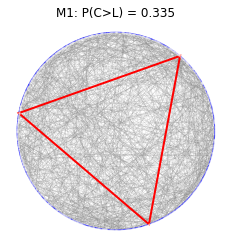

In [8]:
#M1
plotBKG()
P1 = []
for i in tqdm(range(1000)):
    try: longer, x, y = randomEndpoints()
    except: continue #random points can be too close and cause error
    plt.plot(x,y,c='gray',linewidth=0.5,alpha=0.25,zorder=0)
    plt.scatter([x[0],x[-1]],[y[0],y[-1]],s=2,c='white',alpha=0.1,zorder=2)
    P1.append(int(longer))
plt.axis('off')
plt.title('M1: P(C>L) = '+str(np.round(np.mean(P1),3)))
plt.show()

100%|██████████| 1000/1000 [01:15<00:00, 13.24it/s]


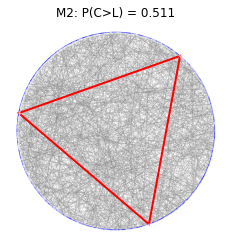

In [9]:
#M2
plotBKG()
P2 = []
for i in tqdm(range(1000)):
    try: longer, x, y = randomRadius()
    except: continue #random points can be too close and cause error
    plt.plot(x,y,c='gray',linewidth=0.5,alpha=0.25,zorder=0)
    plt.scatter([x[0],x[-1]],[y[0],y[-1]],s=2,c='white',alpha=0.1,zorder=2)
    P2.append(int(longer))
plt.axis('off')
plt.title('M2: P(C>L) = '+str(np.round(np.mean(P2),3)))
plt.show()

100%|██████████| 1000/1000 [01:13<00:00, 13.56it/s]


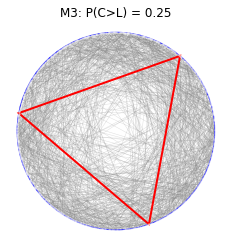

In [10]:
#M3
plotBKG()
P3 = []
for i in tqdm(range(1000)):
    try: longer, x, y = randomMidpoint()
    except: continue #random points can be too close and cause error
    plt.plot(x,y,c='gray',linewidth=0.5,alpha=0.25,zorder=0)
    plt.scatter([x[0],x[-1]],[y[0],y[-1]],s=2,c='white',alpha=0.1,zorder=2)
    P3.append(int(longer))
plt.axis('off')
plt.title('M3: P(C>L) = '+str(np.round(np.mean(P3),3)))
plt.show()

### Discussion

<br>

Clearly, the source of the differences lies in how many RNGs and their associated ranges.

M1: 2 points on the circle, generated by 2 random $\theta \in (0,2\pi)$

M2: 1 point on a radius, generated by one random $\theta \in (0,2\pi)$, and a random $r \in (0,R)$

M3: 1 point within the circle, generated by a random $x$ and a random $y \in (-R,R)$

The first thing to note is for M3, $x$ and $y$ are conditional to $R^2 = x^2+y^2$,
and so they do not uniformly occupy the square $(R\times R)$. If one chooses instead,
to generate random $x$ and $y$ within the square, and construct their chord from the
resulting line (assuming it crosses the circle), one gets $P(C>L=2/3)$.

Perhaps we also want to ask why M2 is the only scale / translation invariant method?
$r$ and $\theta$ together uniquely define all points within a circle, unlike $x$ and $y$.
But what about M1? 2 random points on a circle clearly has a bias for the edges,
which you can see by hiding the circle itself, or comparing edge points.

Therefore one needs random uniform $\theta$ and $r$ to relieve oneself of most bias.

In [11]:
#anywallsocket@github.com